# **Experiment Notebook**



In [1]:
# Do not modify this code
!pip install -q utstd

from utstd.ipyrenders import *


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
! pip install -i https://test.pypi.org/simple/ my_krml_25548684_at1==0.3.0

Looking in indexes: https://test.pypi.org/simple/



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# Do not modify this code
import warnings
warnings.simplefilter(action='ignore')

## 0. Import Packages and Declare Constants

In [4]:
# <Student to fill this section>

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os

# Import libraries from custom package
from my_krml_25548684_at1.data.sets import *
from my_krml_25548684_at1.plots.numeric import *
from my_krml_25548684_at1.plots.layout import *
from my_krml_25548684_at1.features.num_cat import *
from my_krml_25548684_at1.features.null import *
from my_krml_25548684_at1.features.info import *
from my_krml_25548684_at1.models.performance import *

# Import libraries for Creating pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

# Import libraries for Data Processing
from sklearn.feature_selection import mutual_info_regression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler

# Import libraries for Saving models and pipelines
import joblib
import cloudpickle
from pathlib import Path

In [5]:
dir_path = "..\\data\\raw\\Ripple"

In [6]:
# Display settings
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sns.set(style='whitegrid', palette='pastel', font_scale=1.1)

---
## A. Project Description


In [7]:
# <Student to fill this section>
student_name = "Siddharth Suresh Nair"
student_id = "25548684"
group_id = "17"

In [8]:
# Do not modify this code
print_tile(size="h1", key='student_name', value=student_name)

In [9]:
# Do not modify this code
print_tile(size="h1", key='student_id', value=student_id)

In [10]:
# Do not modify this code
print_tile(size="h1", key='group_id', value=group_id)

---
## B. Business Understanding

In [11]:
# <Student to fill this section>
business_use_case_description = """
The goal of this project is to provide a business-oriented cryptocurrency insights platform that helps investors make informed decisions 
in a highly volatile market. By integrating historical market data, interactive visualizations, and machine learning-based predictions of 
next-day price highs, the platform reduces uncertainty and risk for users. It also serves as a decision-support tool, bridging complex 
financial data and actionable insights, while remaining accessible to both technical and non-technical users.
"""

In [12]:
# Do not modify this code
print_tile(size="h3", key='business_use_case_description', value=business_use_case_description)

In [13]:
# <Student to fill this section>
business_objectives = """
Accurate results from the platform can significantly enhance investor decision-making by providing reliable insights into short-term 
cryptocurrency price movements, reducing investment risks, and improving confidence in market analysis. Conversely, incorrect predictions 
may mislead users, potentially resulting in poor investment choices, financial losses, and reduced trust in the platform. Therefore, 
the quality and reliability of the predictive models directly impact both user outcomes and the credibility of the business solution.
"""

In [14]:
# Do not modify this code
print_tile(size="h3", key='business_objectives', value=business_objectives)

In [15]:
# <Student to fill this section>
stakeholders_expectations_explanations = """
The results of this project will be used to support investment decisions by providing insights into short-term cryptocurrency price trends 
and potential market movements. Retail investors will rely on the predictions to assess risk and optimize trading strategies, while financial 
enthusiasts and students may use the platform as an educational tool to understand market behavior and forecasting methods. Developers and 
data analysts involved in the project will use the outputs to refine models and validate assumptions. Overall, the predictions impact both 
users’ financial decisions and the credibility and effectiveness of the platform as a decision-support tool.
"""

In [16]:
# Do not modify this code
print_tile(size="h3", key='stakeholders_expectations_explanations', value=stakeholders_expectations_explanations)

---
## C. Data Understanding

### C.1   Load Datasets


In [17]:
# Load all the data files
all_files = []

for root, _, files in os.walk(dir_path):
    for file in files:
        if file.endswith('.csv'):
            all_files.append(os.path.join(root, file))

In [18]:
# Checking if all files are loaded
all_files

['..\\data\\raw\\Ripple\\XRP_01_01_2015-01_01_2016_historical_data_coinmarketcap.csv',
 '..\\data\\raw\\Ripple\\XRP_01_01_2016-01_01_2017_historical_data_coinmarketcap.csv',
 '..\\data\\raw\\Ripple\\XRP_01_01_2017-01_01_2018_historical_data_coinmarketcap.csv',
 '..\\data\\raw\\Ripple\\XRP_01_01_2018-01_01_2019_historical_data_coinmarketcap.csv',
 '..\\data\\raw\\Ripple\\XRP_01_01_2019-01_01_2020_historical_data_coinmarketcap.csv',
 '..\\data\\raw\\Ripple\\XRP_01_01_2020-01_01_2021_historical_data_coinmarketcap.csv',
 '..\\data\\raw\\Ripple\\XRP_01_01_2021-01_01_2022_historical_data_coinmarketcap.csv',
 '..\\data\\raw\\Ripple\\XRP_01_01_2022-01_01_2023_historical_data_coinmarketcap.csv',
 '..\\data\\raw\\Ripple\\XRP_01_01_2023-01_01_2024_historical_data_coinmarketcap.csv',
 '..\\data\\raw\\Ripple\\XRP_01_01_2024-01_01_2025_historical_data_coinmarketcap.csv']

In [19]:
# Create a variable for loading all the dataframes
all_df = []

In [20]:
# Append all the dataframes to 'all_df'
for f in all_files:
    try:
        df = pd.read_csv(f, sep = ';')
        all_df.append(df)
    except Exception as e:
        print(f"Error when reading file {f} -> {e}")

In [21]:
# Concatenate all the dataframes
df = pd.concat(all_df, ignore_index = True)

In [22]:
# Display the concatenated dataframes
df

,timeOpen,timeClose,timeHigh,timeLow,name,open,high,low,close,volume,marketCap,timestamp
0,2015-12-31T00:00:00.000Z,2015-12-31T23:59:59.999Z,2015-12-31T00:04:04.000Z,2015-12-31T23:49:05.000Z,2781,0.01,0.01,0.01,0.01,374355.00,202579216.80,2015-12-31T23:59:59.999Z
1,2015-12-30T00:00:00.000Z,2015-12-30T23:59:59.999Z,2015-12-30T00:44:06.000Z,2015-12-30T14:09:03.000Z,2781,0.01,0.01,0.01,0.01,280345.00,207320069.31,2015-12-30T23:59:59.999Z
2,2015-12-29T00:00:00.000Z,2015-12-29T23:59:59.999Z,2015-12-29T01:09:04.000Z,2015-12-29T22:49:05.000Z,2781,0.01,0.01,0.01,0.01,312612.00,210089591.09,2015-12-29T23:59:59.999Z
3,2015-12-28T00:00:00.000Z,2015-12-28T23:59:59.999Z,2015-12-28T08:09:03.000Z,2015-12-28T21:39:04.000Z,2781,0.01,0.01,0.01,0.01,469583.00,212634412.04,2015-12-28T23:59:59.999Z
4,2015-12-27T00:00:00.000Z,2015-12-27T23:59:59.999Z,2015-12-27T23:49:04.000Z,2015-12-27T02:34:04.000Z,2781,0.01,0.01,0.01,0.01,465856.00,212734353.61,2015-12-27T23:59:59.999Z
...,...,...,...,...,...,...,...,...,...,...,...,...
3648,2024-01-05T00:00:00.000Z,2024-01-05T23:59:59.999Z,2024-01-05T00:28:00.000Z,2024-01-05T17:10:00.000Z,2781,0.59,0.59,0.56,0.58,1509144161.80,31251562527.66,2024-01-05T23:59:59.999Z
3649,2024-01-04T00:00:00.000Z,2024-01-04T23:59:59.999Z,2024-01-04T22:25:00.000Z,2024-01-04T10:25:00.000Z,2781,0.58,0.59,0.57,0.59,1452005657.02,31837800582.18,2024-01-04T23:59:59.999Z
3650,2024-01-03T00:00:00.000Z,2024-01-03T23:59:59.999Z,2024-01-03T05:31:00.000Z,2024-01-03T12:16:00.000Z,2781,0.63,0.64,0.54,0.58,3406740411.77,31532229589.65,2024-01-03T23:59:59.999Z
3651,2024-01-02T00:00:00.000Z,2024-01-02T23:59:59.999Z,2024-01-02T10:01:00.000Z,2024-01-02T17:43:00.000Z,2781,0.63,0.64,0.62,0.63,1326197378.05,33847840411.96,2024-01-02T23:59:59.999Z


### C.2 Define Target variable

In [23]:
# Define the target variable
target_name = 'high_next_day'

In [24]:
# <Student to fill this section>
target_definition_explanations = """
The target variable, defined as the next-day high price (high_next_day), aligns directly with the project’s business objective of supporting 
short-term investment decisions. Predicting the next-day high enables investors to anticipate potential price peaks, assess market opportunities, 
and manage risk more effectively, providing actionable insights for informed cryptocurrency trading and portfolio strategies.
"""

In [25]:
# Do not modify this code
print_tile(size="h3", key='target_definition_explanations', value=target_definition_explanations)

### C.3 Create Target variable

In [26]:
# Sort chronologically before creating target
df = df.sort_values(by='timeOpen', ascending=True).reset_index(drop=True)
df[target_name] = df['high'].shift(-1)

In [27]:
df.head()

,timeOpen,timeClose,timeHigh,timeLow,name,open,high,low,close,volume,marketCap,timestamp,high_next_day
0,2015-01-01T00:00:00.000Z,2015-01-01T23:59:59.999Z,2015-01-01T00:04:04.000Z,2015-01-01T05:24:04.000Z,2781,0.02,0.02,0.02,0.02,399022.00,755558351.94,2015-01-01T23:59:59.999Z,0.02
1,2015-01-02T00:00:00.000Z,2015-01-02T23:59:59.999Z,2015-01-02T03:09:04.000Z,2015-01-02T23:09:05.000Z,2781,0.02,0.02,0.02,0.02,459956.00,753340321.75,2015-01-02T23:59:59.999Z,0.02
2,2015-01-03T00:00:00.000Z,2015-01-03T23:59:59.999Z,2015-01-03T00:29:04.000Z,2015-01-03T23:59:04.000Z,2781,0.02,0.02,0.02,0.02,2171040.00,684798232.56,2015-01-03T23:59:59.999Z,0.02
3,2015-01-04T00:00:00.000Z,2015-01-04T23:59:59.999Z,2015-01-04T00:49:04.000Z,2015-01-04T23:04:04.000Z,2781,0.02,0.02,0.02,0.02,3801010.00,586349909.58,2015-01-04T23:59:59.999Z,0.02
4,2015-01-05T00:00:00.000Z,2015-01-05T23:59:59.999Z,2015-01-05T23:59:04.000Z,2015-01-05T00:09:04.000Z,2781,0.02,0.02,0.02,0.02,3051930.00,629350575.76,2015-01-05T23:59:59.999Z,0.02


In [28]:
# An Overview of the dataset in terms of data type, null count, unique values and target count for each feature
# From custom package
dataset_overview(df, target_col = target_name)

,dtype,null_count,unique_count,target_unique
timeOpen,object,0,3653,3652
timeClose,object,0,3653,3652
timeHigh,object,0,3653,3652
timeLow,object,0,3653,3652
name,int64,0,1,3652
open,float64,0,3652,3652
high,float64,0,3653,3652
low,float64,0,3652,3652
close,float64,0,3652,3652
volume,float64,0,3653,3652


### C.4 Explore Target variable `high_next_day`

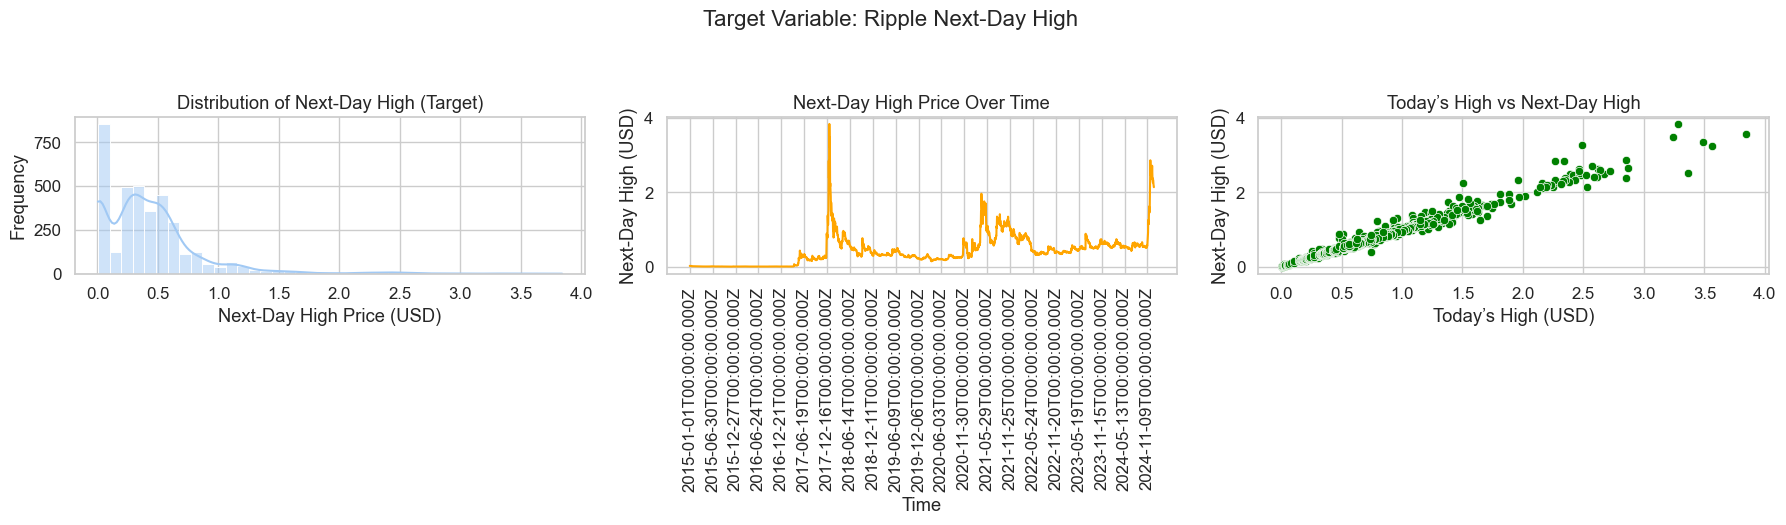

(<Figure size 1800x500 with 3 Axes>,
 array([<Axes: title={'center': 'Distribution of Next-Day High (Target)'}, xlabel='Next-Day High Price (USD)', ylabel='Frequency'>,
        <Axes: title={'center': 'Next-Day High Price Over Time'}, xlabel='Time', ylabel='Next-Day High (USD)'>,
        <Axes: title={'center': 'Today’s High vs Next-Day High'}, xlabel='Today’s High (USD)', ylabel='Next-Day High (USD)'>],
       dtype=object))

In [29]:
# Plotting the distribution, time series and relationship between the target and today's high

# Distribution
def plot_dist(ax):
    sns.histplot(df[target_name], kde = True, bins = 40, ax = ax)
    ax.set_xlabel('Next-Day High Price (USD)')
    ax.set_ylabel('Frequency')

# Time series
def plot_timeseries(ax):
    ax.plot(df['timeOpen'], df[target_name], color='orange')
    ax.set_xlabel('Time')
    ax.set_ylabel('Next-Day High (USD)')
    step = 180
    ax.set_xticks(df['timeOpen'][::step])
    ax.tick_params(axis='x', rotation=90)

# Relationship with Today’s High
def plot_scatter(ax):
    sns.scatterplot(x='high', y = target_name, data=df, color='green', ax=ax)
    ax.set_xlabel('Today’s High (USD)')
    ax.set_ylabel('Next-Day High (USD)')

# From Custom Package
create_tripanel_plot(
    [plot_dist, plot_timeseries, plot_scatter],
    titles=['Distribution of Next-Day High (Target)', 'Next-Day High Price Over Time', 'Today’s High vs Next-Day High'],
    suptitle='Target Variable: Ripple Next-Day High'
)


In [30]:
# <Student to fill this section>
target_distribution_explanations = """
The target variable, representing Ripple’s next-day high price, exhibits a right-skewed distribution, with most values concentrated 
below $1.00 and a few extreme spikes during major market surges. This imbalance reflects Ripple’s inherent volatility and cyclical 
market behavior, where prolonged stability is occasionally disrupted by rapid price increases. While this pattern offers valuable insights 
into temporal dynamics, it also presents modeling challenges—particularly sensitivity to outliers and difficulty in capturing abrupt market shifts. 
Additionally, external factors such as regulatory announcements or macroeconomic events, not included in the dataset, may limit the model’s ability 
to fully explain extreme price movements.
"""

In [31]:
# Do not modify this code
print_tile(size="h3", key='target_distribution_explanations', value=target_distribution_explanations)

### C.5 Explore Feature of Interest `open`

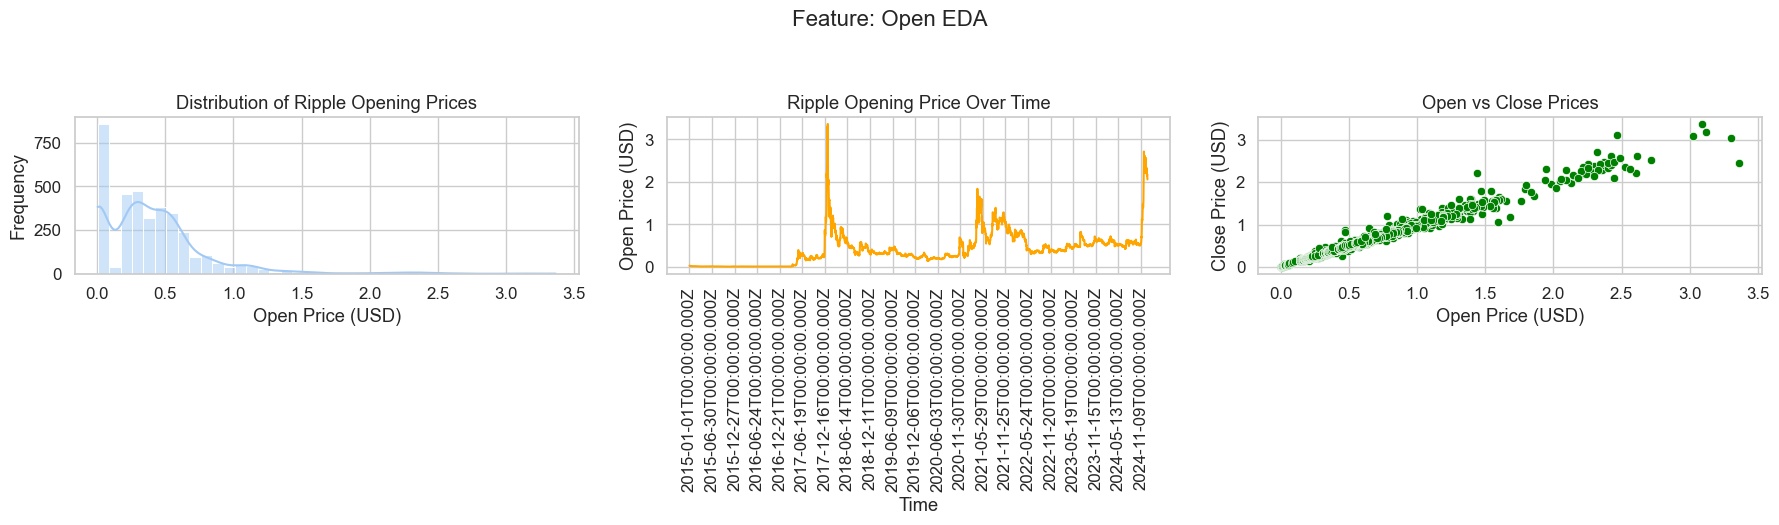

(<Figure size 1800x500 with 3 Axes>,
 array([<Axes: title={'center': 'Distribution of Ripple Opening Prices'}, xlabel='Open Price (USD)', ylabel='Frequency'>,
        <Axes: title={'center': 'Ripple Opening Price Over Time'}, xlabel='Time', ylabel='Open Price (USD)'>,
        <Axes: title={'center': 'Open vs Close Prices'}, xlabel='Open Price (USD)', ylabel='Close Price (USD)'>],
       dtype=object))

In [32]:
# Plotting the distribution, time series and relationship between the open and close price

# Distribution
def plot_dist(ax):
    sns.histplot(df['open'], kde = True, bins = 40, ax = ax)
    ax.set_xlabel('Open Price (USD)')
    ax.set_ylabel('Frequency')

# Time series
def plot_timeseries(ax):
    ax.plot(df['timeOpen'], df['open'], color='orange')
    ax.set_xlabel('Time')
    ax.set_ylabel('Open Price (USD)')
    step = 180
    ax.set_xticks(df['timeOpen'][::step])
    ax.tick_params(axis='x', rotation=90)

# Relationship with Close
def plot_scatter(ax):
    sns.scatterplot(x='open', y='close', data=df, color='green', ax=ax)
    ax.set_xlabel('Open Price (USD)')
    ax.set_ylabel('Close Price (USD)')

# From Custom Package
create_tripanel_plot(
    [plot_dist, plot_timeseries, plot_scatter],
    titles=['Distribution of Ripple Opening Prices', 'Ripple Opening Price Over Time', 'Open vs Close Prices'],
    suptitle='Feature: Open EDA'
)


In [33]:
# <Student to fill this section>
feature_1_insights = """
Ripple’s opening price exhibits a right-skewed distribution, with most values concentrated below $1.00 and infrequent spikes during major 
market rallies. This highlights a pattern of generally low valuations interrupted by rare surges, reflecting the asset’s volatile and cyclical 
nature. The strong positive correlation between opening and closing prices indicates consistent daily price behavior with limited intraday 
volatility. While this stability enhances the model’s ability to learn short-term patterns, the skewed distribution may bias learning toward lower 
values. Despite this, the feature provides essential context for understanding price continuity and short-term market sentiment.
"""

In [34]:
# Do not modify this code
print_tile(size="h3", key='feature_1_insights', value=feature_1_insights)

### C.6 Explore Feature of Interest `volume`

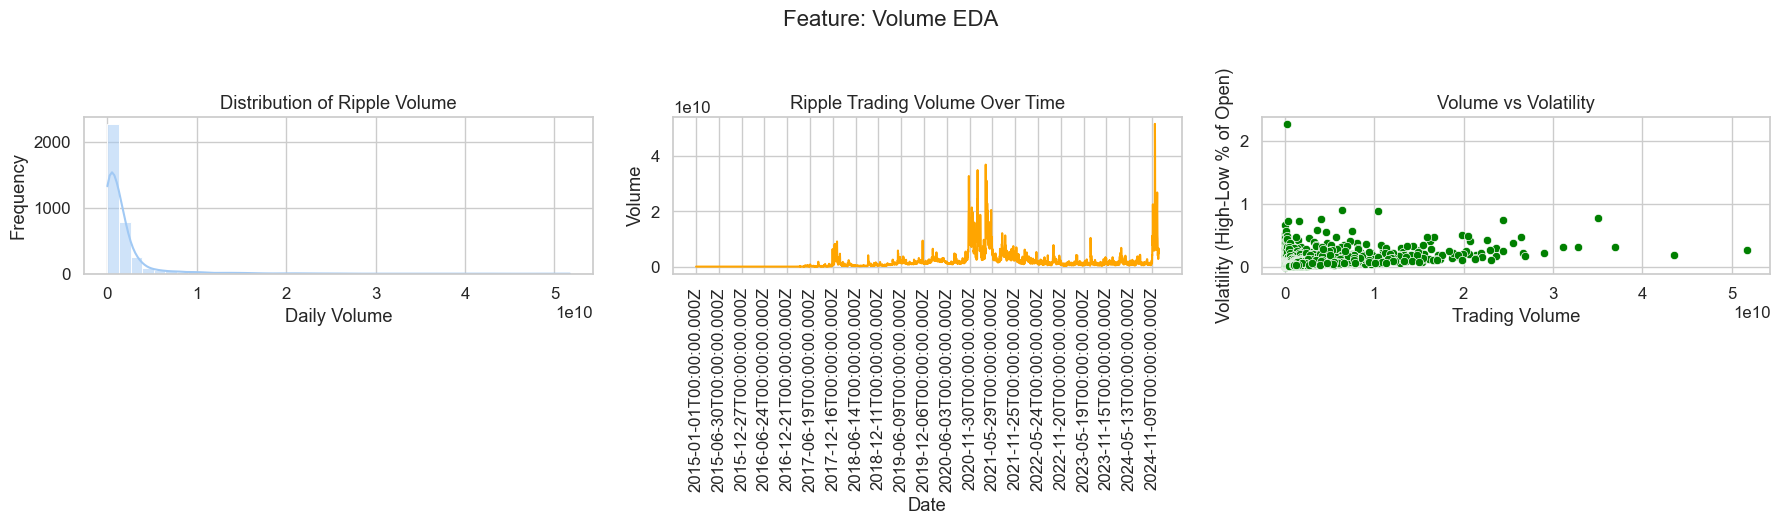

(<Figure size 1800x500 with 3 Axes>,
 array([<Axes: title={'center': 'Distribution of Ripple Volume'}, xlabel='Daily Volume', ylabel='Frequency'>,
        <Axes: title={'center': 'Ripple Trading Volume Over Time'}, xlabel='Date', ylabel='Volume'>,
        <Axes: title={'center': 'Volume vs Volatility'}, xlabel='Trading Volume', ylabel='Volatility (High-Low % of Open)'>],
       dtype=object))

In [35]:
# Plotting the distribution, time series and relationship between the volume and parkinson volatility
volatility = (df['high'] - df['low']) / df['open']

# Distribution
def plot_dist(ax):
    sns.histplot(df['volume'], kde = True, bins = 40, ax = ax)
    ax.set_xlabel('Daily Volume')
    ax.set_ylabel('Frequency')

# Time series
def plot_timeseries(ax):
    ax.plot(df['timeOpen'], df['volume'], color='orange')
    ax.set_xlabel('Date')
    ax.set_ylabel('Volume')
    step = 180
    ax.set_xticks(df['timeOpen'][::step])
    ax.tick_params(axis='x', rotation=90)

# Relationship with Volatility
def plot_scatter(ax):
    sns.scatterplot(x='volume', y=volatility, data=df, color='green', ax=ax)
    ax.set_xlabel('Trading Volume')
    ax.set_ylabel('Volatility (High-Low % of Open)')

# From Custom Package
create_tripanel_plot(
    [plot_dist, plot_timeseries, plot_scatter],
    titles=['Distribution of Ripple Volume', 'Ripple Trading Volume Over Time', 'Volume vs Volatility'],
    suptitle='Feature: Volume EDA'
)


In [36]:
# <Student to fill this section>
feature_2_insights = """
Ripple’s daily trading volume is highly right-skewed, with most observations at low levels and occasional large spikes during periods of 
intense market activity. These sudden increases often correspond with speculative trading or major news events, capturing shifts in market 
participation and liquidity. Although this feature enhances the model’s ability to detect momentum and investor interest, the irregular distribution 
and dominance of low-volume days may reduce consistency. The weak positive correlation between volume and volatility suggests that while increased 
trading activity can precede price swings, the relationship is not always linear or predictable.
"""

In [37]:
# Do not modify this code
print_tile(size="h3", key='feature_2_insights', value=feature_2_insights)

### C.7 Explore Feature of Interest `marketCap`


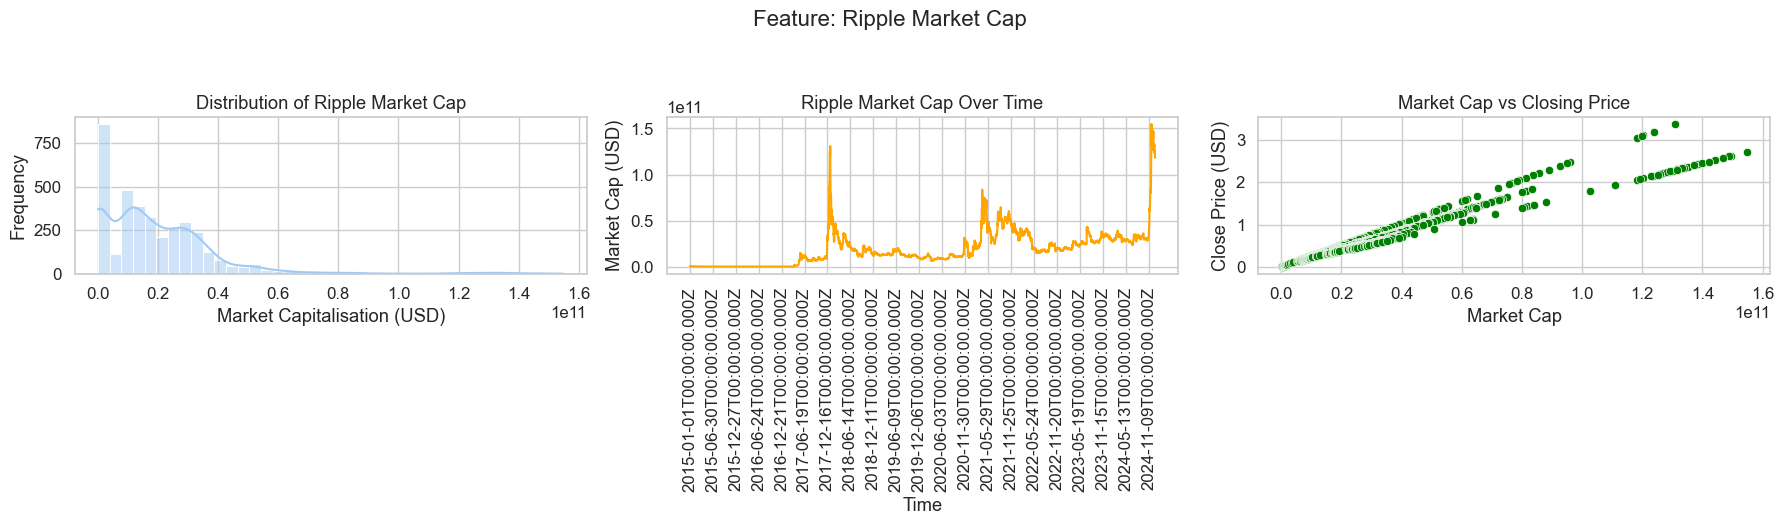

(<Figure size 1800x500 with 3 Axes>,
 array([<Axes: title={'center': 'Distribution of Ripple Market Cap'}, xlabel='Market Capitalisation (USD)', ylabel='Frequency'>,
        <Axes: title={'center': 'Ripple Market Cap Over Time'}, xlabel='Time', ylabel='Market Cap (USD)'>,
        <Axes: title={'center': 'Market Cap vs Closing Price'}, xlabel='Market Cap', ylabel='Close Price (USD)'>],
       dtype=object))

In [38]:
# Plotting the distribution, time series and relationship between the marketCap and closing price

# Distribution
def plot_dist(ax):
    sns.histplot(df['marketCap'], kde = True, bins = 40, ax = ax)
    ax.set_xlabel('Market Capitalisation (USD)')
    ax.set_ylabel('Frequency')

# Time series
def plot_timeseries(ax):
    ax.plot(df['timeOpen'], df['marketCap'], color='orange')
    ax.set_xlabel('Time')
    ax.set_ylabel('Market Cap (USD)')
    step = 180
    ax.set_xticks(df['timeOpen'][::step])
    ax.tick_params(axis='x', rotation=90)

# Relationship with Close
def plot_scatter(ax):
    sns.scatterplot(x='marketCap', y='close', data=df, color='green', ax=ax)
    ax.set_xlabel('Market Cap')
    ax.set_ylabel('Close Price (USD)')

# From Custom Package
create_tripanel_plot(
    [plot_dist, plot_timeseries, plot_scatter],
    titles=['Distribution of Ripple Market Cap', 'Ripple Market Cap Over Time', 'Market Cap vs Closing Price'],
    suptitle='Feature: Ripple Market Cap'
)


In [39]:
# <Student to fill this section>
feature_n_insights = """
Ripple’s market capitalisation follows a right-skewed distribution, dominated by moderate valuations and intermittent peaks during bullish 
market cycles. These peaks, aligning with historical crypto rallies, highlight how investor sentiment and market conditions drive rapid valuation 
surges. The strong positive correlation with closing price reinforces market capitalisation as a key explanatory variable in modeling price dynamics. 
However, short-term fluctuations influenced by circulating supply and external factors add variability. Despite this, market capitalisation remains 
an essential feature, providing a macro-level perspective on Ripple’s valuation trends and contributing to the model’s understanding of overall
market strength.
"""

In [40]:
# Do not modify this code
print_tile(size="h3", key='feature_n_insights', value=feature_n_insights)

---
## D. Data Preparation for Modeling

In [41]:
# Create the features 'X' and target variable 'y' from the custom package
X, y = pop_target(df = df, target_col = target_name)

In [42]:
# Splitting the dataset into training, validation and test sets from the custom package
X_train_val, y_train_val, X_test, y_test = data_splitting_based_on_time(X = X, y = y, date_col = 'timeOpen', test_size = 0.2, random_state = 42)

In [43]:
# Splitting the train_val dataset into training and validation sets from the custom package
X_train, y_train, X_val, y_val = data_splitting_based_on_time(X = X_train_val, y = y_train_val, date_col = 'timeOpen', test_size = 0.2, random_state = 42)

In [44]:
# Create the training, validation and test dataframe
train_df = pd.concat([X_train, y_train], axis = 1)
val_df = pd.concat([X_val, y_val], axis = 1)
test_df = pd.concat([X_test, y_test], axis = 1)

---
## E. Feature Selection


### E.1 Approach "Removing constant features"


In [45]:
# Recording features that have the same value for every record
constant_features = constant_columns(train_df)
constant_features

['name']

In [46]:
# <Student to fill this section>
feature_selection_1_insights = """
Constant feature removal was applied to eliminate variables that offered no variability or predictive information, such as identifiers 
or static columns. These features do not contribute to model learning and can introduce unnecessary computational complexity. Removing them 
streamlined the dataset, improved processing efficiency, and ensured that only meaningful, data-driven attributes influenced the model, 
thereby enhancing generalisation and predictive performance.
"""

In [47]:
# Do not modify this code
print_tile(size="h3", key='feature_selection_1_insights', value=feature_selection_1_insights)

### E.2 Approach "Removing Timestamp features"


In [48]:
# Record the timestamp features
timestamp_features = ['timeOpen', 'timeClose', 'timeHigh', 'timeLow', 'timestamp']

In [49]:
# <Student to fill this section>
feature_selection_2_insights = """
Timestamp features were removed because they did not directly contribute to predicting future price movements. Their primary purpose was to 
order the dataset chronologically, ensuring correct temporal sequencing. Retaining them could introduce noise or lead to temporal leakage, 
where future information inadvertently influences model training. Removing these attributes improved data integrity and maintained the model’s 
predictive reliability and fairness.
"""

In [50]:
# Do not modify this code
print_tile(size="h3", key='feature_selection_2_insights', value=feature_selection_2_insights)

## E.3 Final Selection of Features

In [51]:
# Combine all the features to be removed
features_to_remove = constant_features + timestamp_features
features_to_remove

['name', 'timeOpen', 'timeClose', 'timeHigh', 'timeLow', 'timestamp']

In [52]:
# Create the final list of features that have been selected
features_list = [x for x in X_train.columns.tolist() if x not in features_to_remove]
features_list.append(target_name)
features_list

['open', 'high', 'low', 'close', 'volume', 'marketCap', 'high_next_day']

In [53]:
# <Student to fill this section>
feature_selection_explanations = """
The selected features — open, high, low, close, volume, and marketCap—represent essential market indicators that capture Ripple’s daily price 
movement, trading activity, and overall valuation trends. These variables collectively reflect both short-term volatility and broader market 
dynamics, providing the model with a comprehensive view of factors influencing price fluctuations. The *high_next_day* feature serves as the target 
variable for prediction.
"""

In [54]:
# Do not modify this code
print_tile(size="h3", key='feature_selection_explanations', value=feature_selection_explanations)

---
## F. Data Preparation

In [55]:
# Creating a new dataframes for the purposes of data cleaning
train_clean = train_df[features_list]
val_clean = val_df[features_list]
test_clean = test_df[features_list]

### F.1 Data Cleaning `Handling Null Values`

In [56]:
# Checking for null values in the training dataset
train_clean.isnull().sum()

open             0
high             0
low              0
close            0
volume           0
marketCap        0
high_next_day    0
dtype: int64

In [57]:
# Checking for null values in the validation dataset
val_clean.isnull().sum()

open             0
high             0
low              0
close            0
volume           0
marketCap        0
high_next_day    0
dtype: int64

In [58]:
# Create a custom-transformer to handle null values
class NumericImputerWrapper(BaseEstimator, TransformerMixin):
    def __init__(self, features):
        self.features = features
        self.imputer = SimpleImputer(strategy="median")
        
    def fit(self, X, y=None):
        self.imputer.fit(X[self.features])
        return self
    
    def transform(self, X):
        X_copy = X.copy()
        X_copy[self.features] = self.imputer.transform(X_copy[self.features])
        return X_copy

In [59]:
# <Student to fill this section>
data_cleaning_1_explanations = """
Handling missing values is crucial to maintain data integrity and ensure reliable model predictions. Even a single null in the target or 
features can disrupt training, evaluation, or inference processes. By removing or imputing missing values, we prevent errors, reduce bias 
and ensure the model generalises well to new data, supporting consistent and robust forecasting.
"""

In [60]:
# Do not modify this code
print_tile(size="h3", key='data_cleaning_1_explanations', value=data_cleaning_1_explanations)

### F.2 Data Cleaning `Handling Duplicate Values`

In [61]:
# Check the number of duplicate values in the training set
train_clean.duplicated().sum()

np.int64(0)

In [62]:
# Check the number of duplicate values in the validation set
val_clean.duplicated().sum()

np.int64(0)

In [63]:
# Check the number of duplicate values in the test set
test_clean.duplicated().sum()

np.int64(0)

In [64]:
# Create a custom-transformer to handle duplicates

class CustomDuplicateHandler(BaseEstimator, TransformerMixin):
    # To determine whether the index should be reset after dropping duplicates
    def __init__(self, reset_index = True):
        self.reset_index = reset_index

    # Created solely to comply with scikit-learn's API, as removing duplicates doesn't require fitting or learning from the data.
    def fit(self, X, y= None):
        return self
    
    # Remove the duplicates from the dataframe and optionally reset the index
    def transform(self, X):
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X)
        X_clean = X.drop_duplicates()
        if self.reset_index:
            X_clean = X_clean.reset_index(drop=True)
        return X_clean

In [65]:
# <Student to fill this section>
data_cleaning_2_explanations = """
Ensuring the absence of duplicates is vital for accurate model training, as repeated records can bias learning and distort performance metrics. 
Implementing a duplicate-handling mechanism safeguards against future data inconsistencies, preserves dataset integrity and maintains 
reproducibility, ensuring the model continues to learn from unique and representative observations.
"""

In [66]:
# Do not modify this code
print_tile(size="h3", key='data_cleaning_2_explanations', value=data_cleaning_2_explanations)

### F.3 Data Transformation <put_name_here>

In [67]:
# Identify the numeric and categorical features in the dataset from the custom package
numerical_features, categorical_features = return_numerical_categorical_features(df = train_clean, target_col = target_name)

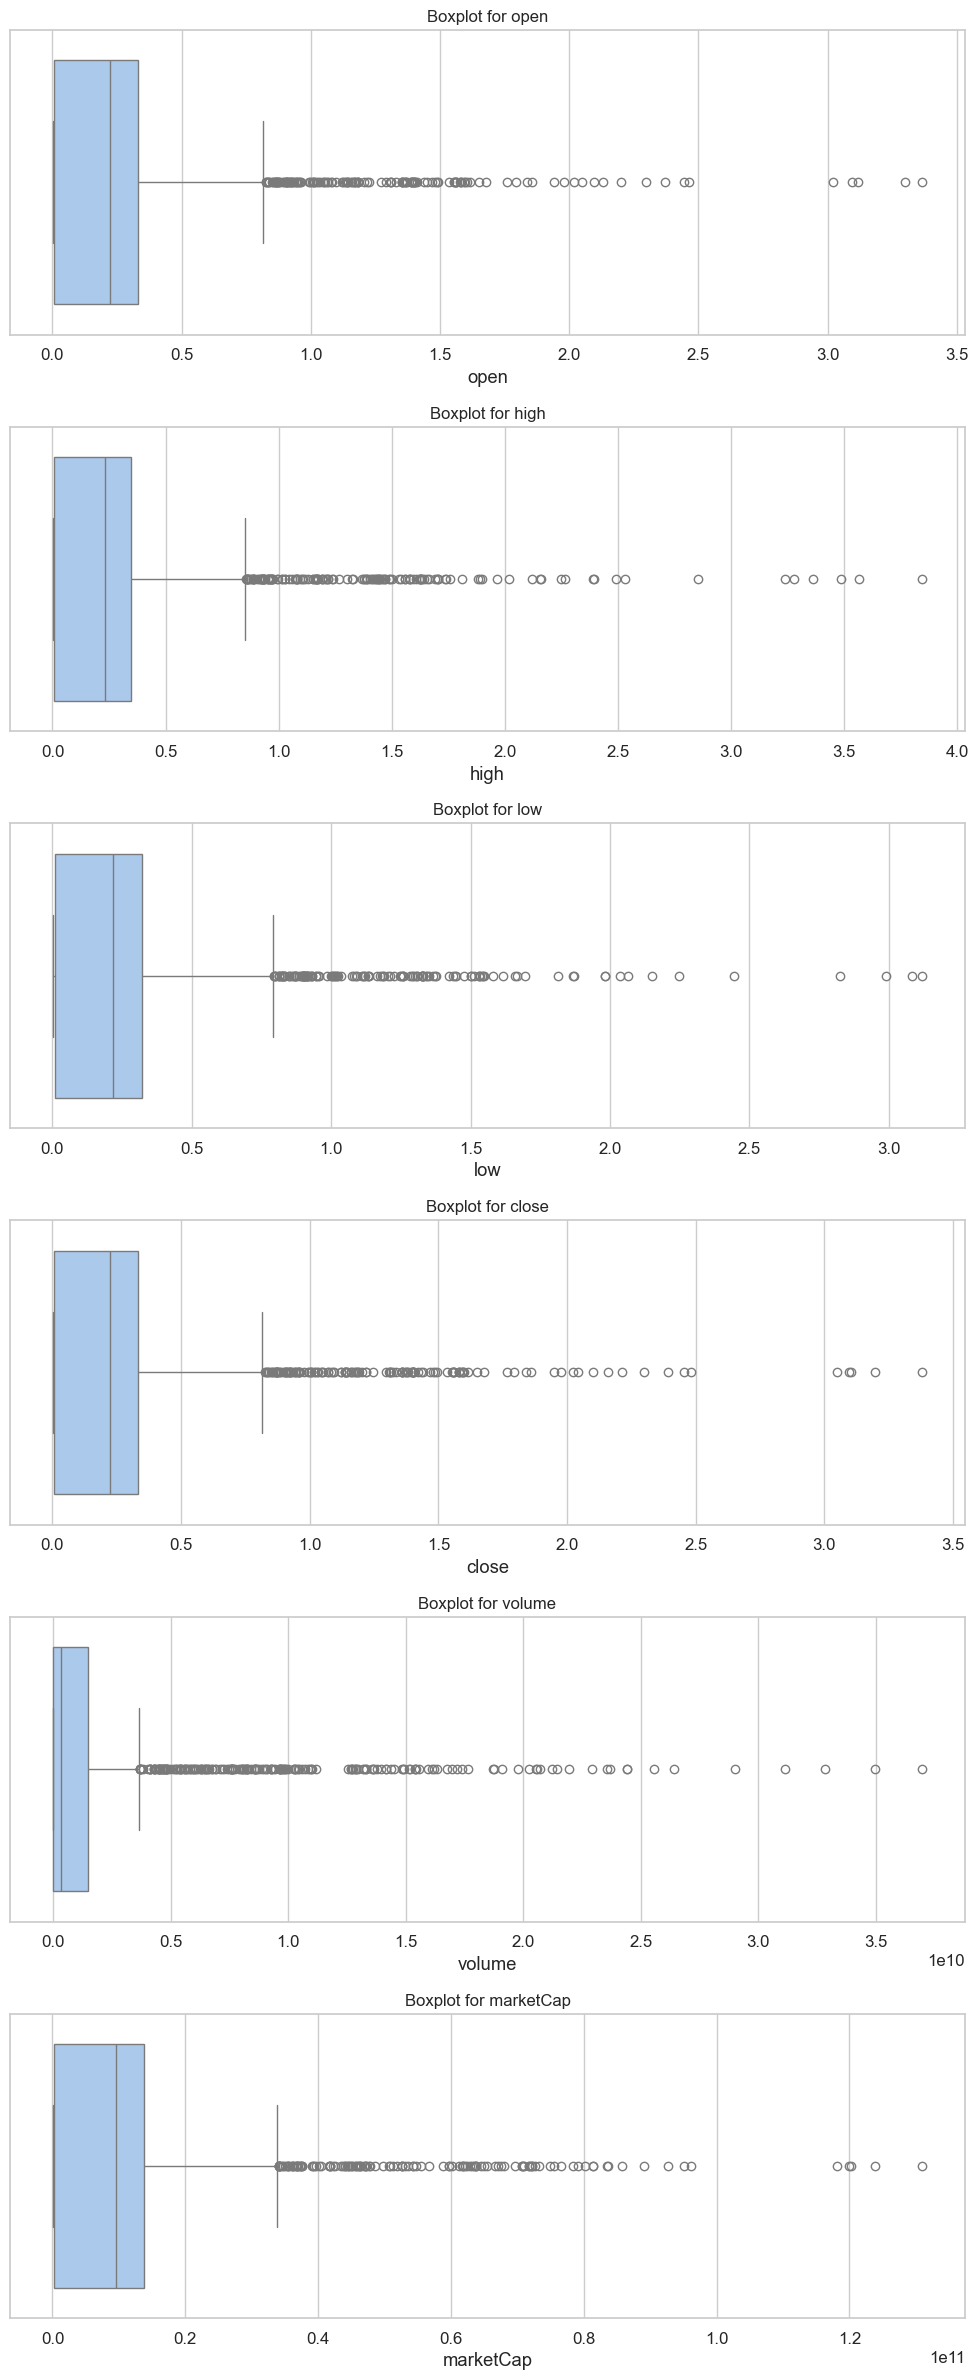

In [68]:
# Plotting the box plot for every numerical feature to identify outliers

plot_boxplots(data = train_clean, columns = numerical_features, figsize=(10, 5), per_col_height=4)

In [69]:
# Create a custom-style transformer to handle outliers

class OutlierHandler(BaseEstimator, TransformerMixin):

    # To initialise with optional feature list and IQR factor for outlier detection
    def __init__(self, features=None, factor=3.0):
        self.features = features
        self.factor = factor
        self.bounds_ = {}

    # Compute IQR-based lower and upper bounds for each specified feature
    def fit(self, X, y=None):
        X_df = pd.DataFrame(X)
        feats = self.features if self.features is not None else X_df.columns

        for feat in feats:
            q1 = X_df[feat].quantile(0.25)
            q3 = X_df[feat].quantile(0.75)
            iqr = q3 - q1
            lower = q1 - self.factor * iqr
            upper = q3 + self.factor * iqr
            self.bounds_[feat] = (lower, upper)
        return self

    # Clip values outside the IQR bounds to reduce outlier impact
    def transform(self, X):
        X_df = pd.DataFrame(X).copy()
        for feat, (lower, upper) in self.bounds_.items():
            X_df[feat] = np.clip(X_df[feat], lower, upper)
        return X_df

In [70]:
# <Student to fill this section>
data_cleaning_3_explanations = """
Outlier treatment in marketCap and volume helps prevent extreme values from disproportionately influencing the model, improving stability and 
predictive accuracy. Price features were preserved to retain genuine market volatility, as removing extreme price points could eliminate 
important signals. This balanced approach ensures that the model learns from representative data while mitigating distortion from rare, extreme 
observations.
"""

In [71]:
# Do not modify this code
print_tile(size="h3", key='data_cleaning_3_explanations', value=data_cleaning_3_explanations)

### F.4 Data Cleaning Pipeline

In [72]:
# Create a pipeline for data cleaning

outlier_features_vol_cap = ['volume', 'marketCap']

cleaning_pipeline = Pipeline(steps=[
    ("imputer", NumericImputerWrapper(features = numerical_features)),
    ("remove_duplicates", CustomDuplicateHandler(reset_index = True)),
    ("outlier_handler_vol_cap", OutlierHandler(features = outlier_features_vol_cap, factor = 6.0))
])

In [73]:
# Fit and transform the training and validation set using the pipeline
train_clean = cleaning_pipeline.fit_transform(train_clean)
val_clean = cleaning_pipeline.transform(val_clean)

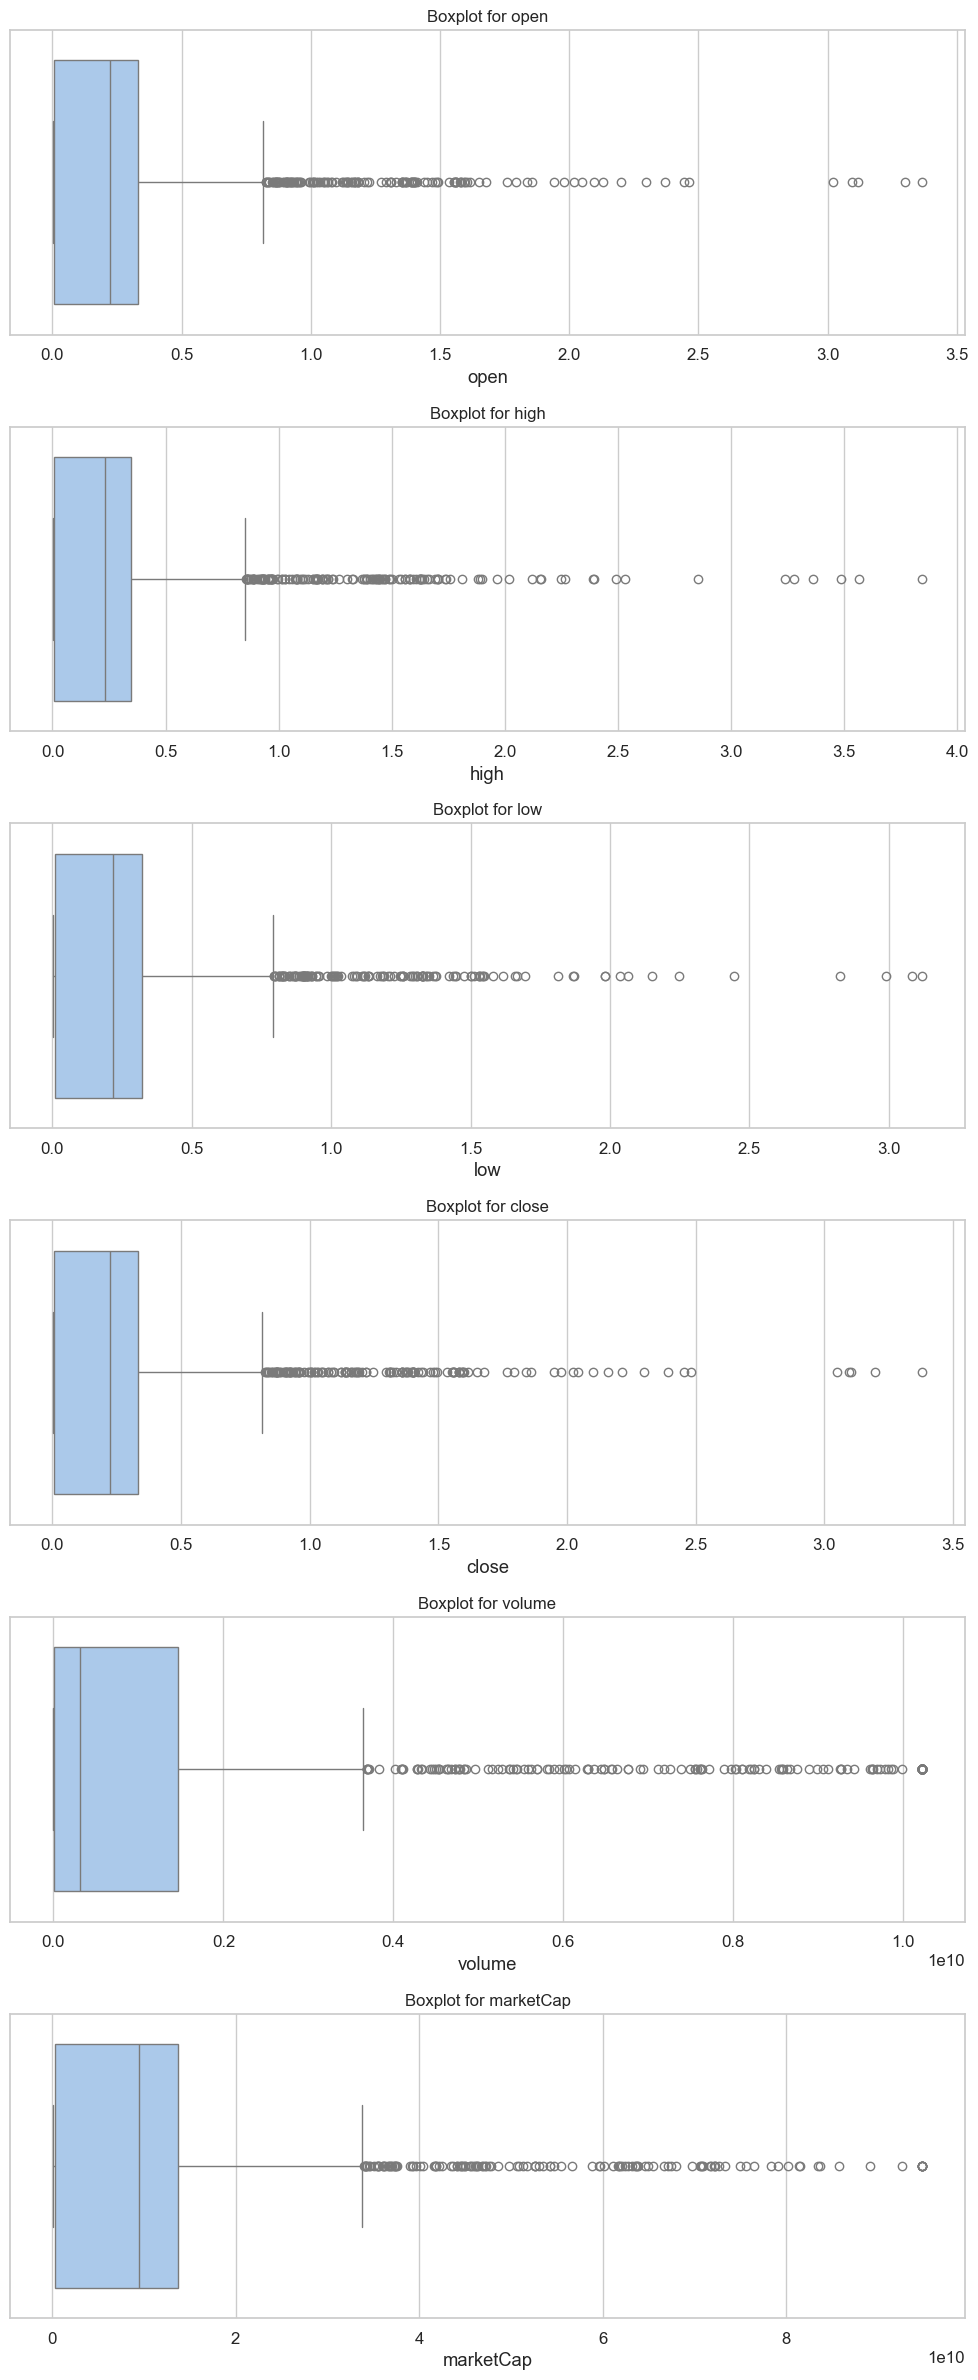

In [74]:
# Plot the outlier features after cleaning
plot_boxplots(data = train_clean, columns = numerical_features, figsize=(10, 5), per_col_height=4)

---
## G. Feature Engineering

In [75]:
# Create copies of the train and validation sets
train_eng = train_clean.copy()
val_eng = val_clean.copy()

### G.1 New Feature `VolatilityBinEstimator`


In [76]:
# Create a custom transformer to engineer the parkinson volatility 
class VolatilityBinEstimator(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None): 
        return self
        
    def transform(self, X):
        X_copy = X.copy()
        X_copy['volatility'] = (X_copy['high'] - X_copy['low']) / X_copy['close']
        X_copy['volatility_bin'] = pd.cut(X_copy['volatility'], bins = [-np.inf, 0.02, 0.08, np.inf], labels = ['low', 'medium', 'high'])
        X_copy.drop(columns = ['volatility'], inplace = True)
        return X_copy

In [77]:
# <Student to fill this section>
feature_engineering_1_explanations = """
Creating volatility categories (low, medium, high) helps the model understand different market states rather than treating all price 
movements equally. Volatile periods often indicate uncertainty and larger price swings, while low volatility suggests stable behavior. 
By distinguishing these contexts, the model can adjust its expectations and improve the accuracy of predicting the next-day high during 
varying market conditions.
"""

In [78]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_1_explanations', value=feature_engineering_1_explanations)

### G.2 New Feature ` DailyReturnEstimator`




In [79]:
# Create a custom transformer to engineer the daily return based on the closing prices
class DailyReturnEstimator(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None): 
        return self
        
    def transform(self, X):
        X_copy = X.copy()
        X_copy['daily_return'] = X_copy['close'].pct_change()
        return X_copy

In [80]:
# <Student to fill this section>
feature_engineering_2_explanations = """
Daily percentage change captures short-term momentum and the direction of recent price movement. If returns are consistently positive, 
upward momentum may continue into the next day; similarly, negative returns indicate potential downward movement. Including this feature 
helps the model account for recent behavioral patterns rather than relying solely on static price values, improving short-term prediction 
reliability.
"""

In [81]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_2_explanations', value=feature_engineering_2_explanations)

### G.3 New Feature `RangeRatioEstimator`



In [82]:
# Create a custom transformer to engineer the ratio of the closing price's range.
class RangeRatioEstimator(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None): 
        return self
        
    def transform(self, X):
        X_copy = X.copy()
        X_copy["range_ratio"] = (X_copy["close"] - X_copy["low"]) / (X_copy["high"] - X_copy["low"] + 1e-6)
        return X_copy

In [83]:
# <Student to fill this section>
feature_engineering_3_explanations = """
The ratio of where the closing price sits within the day’s total price range indicates market strength or weakness. A close near the high 
suggests bullish pressure, while a close near the low suggests selling pressure. This feature helps the model infer whether the market is 
likely to push further upward the following day, improving prediction accuracy for the next-day high.
"""

In [84]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_3_explanations', value=feature_engineering_3_explanations)

### G.4 New Feature `RelativeStrengthIndexEstimator`



In [85]:
# Create a custom transformer to engineer the relative strength index
class RelativeStrengthIndexEstimator(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None): 
        return self
        
    def transform(self, X):
        X_copy = X.copy()
        X_copy['delta'] = X_copy['close'].diff()
        gain = (X_copy['delta'].where(X_copy['delta'] > 0, 0)).rolling(window = 7).mean()
        loss = (-X_copy['delta'].where(X_copy['delta'] < 0, 0)).rolling(window = 7).mean()
        rs = gain / loss
        X_copy['rsi'] = 100 - (100 / (1 + rs))
        return X_copy

In [86]:
# <Student to fill this section>
feature_engineering_4_explanations = """
RSI helps identify whether an asset is overbought or oversold. Overbought conditions may signal an upcoming price correction, while oversold 
conditions can indicate possible recovery. By incorporating RSI, the model can recognize momentum reversals and trend exhaustion points, 
leading to more informed predictions about price peaks rather than assuming trends will continue indefinitely.
"""

In [87]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_4_explanations', value=feature_engineering_4_explanations)

### G.5 New Feature `MovingAverageConvergenceDivergenceEstimator`



In [88]:
# Create a custom transformer to engineer the convergence and divergence of moving averages
class MovingAverageConvergenceDivergenceEstimator(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None): 
        return self
        
    def transform(self, X):
        X_copy = X.copy()
        exp1 = X_copy['close'].ewm(span=6, adjust=False).mean()
        exp2 = X_copy['close'].ewm(span=13, adjust=False).mean()
        macd = exp1 - exp2
        signal_line = macd.ewm(span=5, adjust=False).mean()
        X_copy['macd_hist'] = macd - signal_line
        X_copy.dropna(subset=['rsi', 'daily_return'], inplace = True)
        return X_copy

In [89]:
# <Student to fill this section>
feature_engineering_5_explanations = """
The MACD histogram reflects momentum shifts by comparing short-term and medium-term moving averages. Positive values suggest strengthening 
upward momentum, while negative values indicate potential downward shifts. Including this feature allows the model to detect emerging trend 
changes before they are fully reflected in raw price data, improving its ability to forecast the next-day high during transitional market phases.
"""

In [90]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_5_explanations', value=feature_engineering_5_explanations)

### G.6 Feature Engineering Pipeline


In [91]:
# Create a pipeline for feature engineering

eng_pipeline = Pipeline([
    ("volatility_bin", VolatilityBinEstimator()),
    ("daily_return", DailyReturnEstimator()),
    ("range_ratio", RangeRatioEstimator()),
    ("rsi", RelativeStrengthIndexEstimator()),
    ("macd", MovingAverageConvergenceDivergenceEstimator())
])

In [92]:
print(eng_pipeline)

Pipeline(steps=[('volatility_bin', VolatilityBinEstimator()),
                ('daily_return', DailyReturnEstimator()),
                ('range_ratio', RangeRatioEstimator()),
                ('rsi', RelativeStrengthIndexEstimator()),
                ('macd', MovingAverageConvergenceDivergenceEstimator())])


In [93]:
# Fit and transform the training and validation set using the pipeline
train_eng = eng_pipeline.fit_transform(train_eng)
val_eng   = eng_pipeline.transform(val_eng)

---
## H. Data Preparation for Modeling

### H.1 Split Datasets

In [94]:
# Dataset splitting using function from custom package
X_train, y_train = pop_target(train_eng, target_name)
X_val, y_val = pop_target(val_eng, target_name)

In [95]:
# <Student to fill this section>
data_splitting_explanations = """
A time-based split is the most suitable strategy because cryptocurrency prices are sequential and dependent on previous values. 
Splitting the dataset chronologically (60% training, 20% validation, 20% testing) prevents data leakage by ensuring future data is 
not used to train the model. This approach better reflects real-world forecasting conditions and improves model reliability.
"""

In [96]:
# Do not modify this code
print_tile(size="h3", key='data_splitting_explanations', value=data_splitting_explanations)

### H.2 Data Transformation `VolatilityBinEncoder`

In [97]:
# Creating a custom transformer to ordinaly encode volatility_bins
class VolatilityBinEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, feature = 'volatility_bin'):
        self.feature = feature
        self.encoder = OrdinalEncoder(categories=[['low', 'medium', 'high']])

    def fit(self, X, y = None):
        self.encoder.fit(X[[self.feature]])
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy[self.feature] = self.encoder.transform(X_copy[[self.feature]])
        return X_copy

In [98]:
# <Student to fill this section>
data_transformation_1_explanations = """
Ordinal encoding converts categorical volatility levels into meaningful numerical values that preserve the relative order. This is 
important because models require numerical inputs and volatility reflects market movement intensity. Encoding ensures the model can 
learn the relationship between volatility shifts and price changes, enabling more accurate pattern recognition and performance in predicting 
high price fluctuations.
"""

In [99]:
# Do not modify this code
print_tile(size="h3", key='data_transformation_1_explanations', value=data_transformation_1_explanations)

### H.3 Data Transformation `LogWrapper`

In [100]:
# Creating a custom transformer to log transform volume and marketCap due to large volatility
class LogWrapper(BaseEstimator, TransformerMixin):
    def __init__(self, features):
        self.features = features

    def fit(self, X, y = None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        for col in self.features:
            if col in X_copy.columns:
                X_copy[col] = np.log1p(X_copy[col].clip(lower=0))
        return X_copy

In [101]:
# <Student to fill this section>
data_transformation_2_explanations = """
Applying a log transformation to highly skewed variables such as marketCap and volume reduces the impact of extreme outliers and stabilises
variance. This is important because financial data often span several magnitudes. Log scaling helps the model focus on proportional changes 
rather than large absolute differences, improving prediction consistency and reducing sensitivity to sudden spikes.
"""

In [102]:
# Do not modify this code
print_tile(size="h3", key='data_transformation_2_explanations', value=data_transformation_2_explanations)

### H.4 Data Transformation `MinMaxScalerWrapper`

In [103]:
# Identify the numeric and categorical features in the dataset from the custom package
numerical_features, categorical_features = return_numerical_categorical_features(df = X_train, target_col = target_name)

In [104]:
# Creating a custom transformer to scale the numerical features
class MinMaxScalerWrapper(BaseEstimator, TransformerMixin):
    def __init__(self, features, feature_range = (0, 1)):
        self.features = features
        self.feature_range = feature_range
        self.scaler = MinMaxScaler(feature_range = feature_range)

    def fit(self, X, y = None):
        self.scaler.fit(X[self.features])
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy[self.features] = self.scaler.transform(X_copy[self.features])
        return X_copy

In [105]:
# <Student to fill this section>
data_transformation_3_explanations = """
Min-Max scaling standardises all numerical features to a common range, ensuring no single feature dominates due to scale differences. This is 
particularly important for neural networks and distance-based models, where unscaled data can lead to unstable gradients and slower learning. 
Normalisation enhances training efficiency, supports faster convergence and improves overall model stability and predictive balance.
"""

In [106]:
# Do not modify this code
print_tile(size="h3", key='data_transformation_3_explanations', value=data_transformation_3_explanations)

### H.5 Data Transformation Pipeline

In [107]:
# Create a pipeline for data transformation

data_transform_pipeline = Pipeline([
    ('vol_bin_encoder', VolatilityBinEncoder()),
    ('log_transform', LogWrapper(features = ['volume', 'marketCap'])),
    ('scaler', MinMaxScalerWrapper(features = numerical_features))
])

In [108]:
print(data_transform_pipeline)

Pipeline(steps=[('vol_bin_encoder', VolatilityBinEncoder()),
                ('log_transform', LogWrapper(features=['volume', 'marketCap'])),
                ('scaler',
                 MinMaxScalerWrapper(features=['open', 'high', 'low', 'close',
                                               'volume', 'marketCap',
                                               'daily_return', 'range_ratio',
                                               'delta', 'rsi', 'macd_hist']))])


In [109]:
# Fit and transform the training and validation set using the pipeline

X_train = data_transform_pipeline.fit_transform(X_train)
X_val   = data_transform_pipeline.transform(X_val)

---
## I. Save Datasets

> Do not change this code

In [110]:
# Do not modify this code
# Save training set
try:
  X_train.to_csv("../data/processed/Ripple/X_train.csv", index=False)
  y_train.to_csv("../data/processed/Ripple/y_train.csv", index=False)

  X_val.to_csv("../data/processed/Ripple/X_val.csv", index=False)
  y_val.to_csv("../data/processed/Ripple/y_val.csv", index=False)
    
except Exception as e:
  print(e)

---
## J. Selection of Performance Metrics

> The R2 score is appropriate because it measures how well the model explains the variance in the actual prices, indicating overall predictive 
effectiveness. RMSE is also essential as it quantifies the average magnitude of prediction errors in the same units as the price. Together, 
they provide a balanced evaluation of both accuracy and practical error impact on real price predictions.


In [111]:
# <Student to fill this section>
from sklearn.metrics import mean_squared_error, r2_score

In [112]:
# <Student to fill this section>
performance_metrics_explanations = """
The R2 score is appropriate because it measures how well the model explains the variance in the actual prices, indicating overall predictive 
effectiveness. RMSE is also essential as it quantifies the average magnitude of prediction errors in the same units as the price. Together, 
they provide a balanced evaluation of both accuracy and practical error impact on real price predictions.
"""

In [113]:
# Do not modify this code
print_tile(size="h3", key='performance_metrics_explanations', value=performance_metrics_explanations)

## K. Train Machine Learning Model

### K.1 Import Algorithm

> XGBoost is well-suited for this task because it handles non-linear relationships and complex market patterns effectively. Its boosting framework reduces bias and variance, improving predictive accuracy for financial time-series data. Additionally, XGBoost manages missing values, supports feature importance analysis, and is optimized for computational efficiency, making it a robust choice for forecasting next-day high prices in volatile markets.


In [114]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from scipy.stats import uniform, randint

In [115]:
# <Student to fill this section>
algorithm_selection_explanations = """
XGBoost is well-suited for this task because it handles non-linear relationships and complex market patterns effectively. Its boosting framework 
reduces bias and variance, improving predictive accuracy for financial time-series data. Additionally, XGBoost manages missing values, supports 
feature importance analysis, and is optimized for computational efficiency, making it a robust choice for forecasting next-day high prices in
volatile markets.
"""

In [116]:
# Do not modify this code
print_tile(size="h3", key='algorithm_selection_explanations', value=algorithm_selection_explanations)

### K.2 Set Hyperparameters

> These hyperparameters control model complexity, learning behaviour and generalisation. max_depth and min_child_weight prevent overfitting by managing tree size. learning_rate and n_estimators balance training speed and accuracy. subsample and colsample reduce variance by promoting diversity among trees. gamma, reg_alpha, and reg_lambda add regularisation to avoid overly complex splits. Tuning them ensures optimal performance and stability in volatile financial data.


In [117]:
# Defining the hyper-parameter grid 

param_grid_xg = {
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.005, 0.095),
    'n_estimators': randint(500, 3000),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5),
    'colsample_bylevel': uniform(0.5, 0.5),
    'gamma': uniform(0, 1.5),
    'reg_alpha': uniform(0, 2),
    'reg_lambda': uniform(0, 10),
    'min_child_weight': randint(1, 10)
}

In [118]:
# <Student to fill this section>
hyperparameters_selection_explanations = """
These hyperparameters control model complexity, learning behaviour and generalisation. max_depth and min_child_weight prevent overfitting by 
managing tree size. learning_rate and n_estimators balance training speed and accuracy. subsample and colsample reduce variance by promoting 
diversity among trees. gamma, reg_alpha, and reg_lambda add regularisation to avoid overly complex splits. Tuning them ensures optimal performance 
and stability in volatile financial data.
"""

In [119]:
# Do not modify this code
print_tile(size="h3", key='hyperparameters_selection_explanations', value=hyperparameters_selection_explanations)

### K.3 Fit Model

In [120]:
# Declare the instances of the two models
xgb_model = xgb.XGBRegressor(random_state=42)

In [121]:
# Performing RandomizedSearchCV to find the best hyper-parameters
xg_search = RandomizedSearchCV(
    estimator = xgb_model,
    param_distributions = param_grid_xg,
    n_iter = 30,               
    scoring = 'neg_root_mean_squared_error',
    cv = 5,
    verbose = 2,
    n_jobs = -1,
    random_state = 42
)

# Fitting the model
xg_search.fit(X_train, y_train)
print("Hyper-parameters of the best XGBoost model:", xg_search.best_params_)
print("RMSE scores for the best XGBoost model:", -xg_search.best_score_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Hyper-parameters of the best XGBoost model: {'colsample_bylevel': np.float64(0.5507357714330161), 'colsample_bytree': np.float64(0.8317508845540279), 'gamma': np.float64(0.00759237576932803), 'learning_rate': np.float64(0.020276764884662374), 'max_depth': 4, 'min_child_weight': 2, 'n_estimators': 1456, 'reg_alpha': np.float64(0.44853861892111957), 'reg_lambda': np.float64(7.121792213475358), 'subsample': np.float64(0.6186245437484)}
RMSE scores for the best XGBoost model: 0.07516800075473994


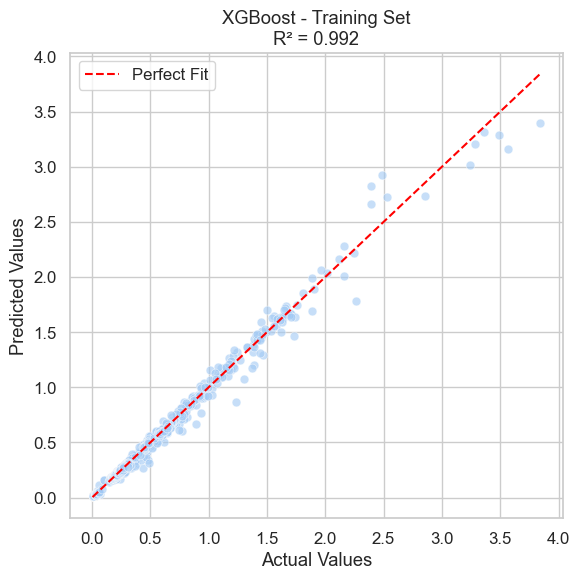

In [122]:
# Compute the performance of random forest on the validation set
y_pred_train = xg_search.best_estimator_.predict(X_train)

# Plotting the R2 curve for training prediction
plot_regression_fit(y_train, y_pred_train, model_name="XGBoost", dataset_type="Training", figsize=(6, 6))

### K.4 Model Technical Performance

> The XGBoost model demonstrated strong and consistent predictive performance across training, validation, and test sets. The RMSE values remained low and R² scores high, indicating that the model effectively captured underlying price patterns without overfitting. The slight increase in test RMSE is reasonable given the inherent volatility of cryptocurrency markets. The close alignment between validation and test results confirms good generalisation. Overall, the model was robust and reliable, though further enhancements could be explored through additional temporal features or hybrid deep-learning approaches.


In [123]:
# Compute the performance of random forest on the validation set
y_pred_val = xg_search.best_estimator_.predict(X_val)

# Printing evaluation metric scores for Validation Dataset
print_regression_scores(y_pred = y_pred_val, y_true = y_val, model_name = "XGBoost", dataset_type = "Validation")

RMSE for the XGBoost model on the Validation dataset: 0.0674
R² for the XGBoost model on the Validation dataset: 0.9472


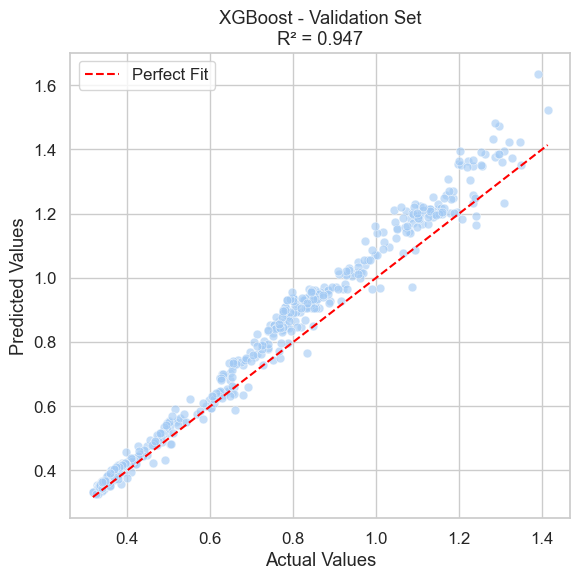

In [124]:
# Plotting the R2 curve for validation prediction
plot_regression_fit(y_val, y_pred_val, model_name="XGBoost", dataset_type="Validation", figsize=(6, 6))

#### K.4 i. Evaluating the model on the Test Dataset

In [125]:
# Print the selected features
features_list

['open', 'high', 'low', 'close', 'volume', 'marketCap', 'high_next_day']

In [126]:
# Create a cleaned test dataset with selected features
test_clean = test_df[features_list]

# Check null values in the dataset
test_clean.isnull().sum()

open             0
high             0
low              0
close            0
volume           0
marketCap        0
high_next_day    1
dtype: int64

In [127]:
# Drop all the instances for which the target variable is null
test_clean.dropna(subset=[target_name], inplace=True)

In [128]:
# Clean the test set using the cleaning pipeline
test_clean = cleaning_pipeline.transform(test_clean)

In [129]:
# Create the new features within the cleaned test set
test_eng = test_clean.copy()

# Engineer the new features of the test set
test_eng = eng_pipeline.transform(test_eng)

In [130]:
# Split the features and target variable
X_test, y_test = pop_target(test_eng, target_name)

# Transform the features of the test set
X_test  = data_transform_pipeline.transform(X_test)

In [131]:
# Compute the performance of Logistic Regression model on the test set
y_pred_test = xg_search.best_estimator_.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)

# Printing evaluation metric scores for Testing Dataset
print_regression_scores(y_pred = y_pred_test, y_true = y_test, model_name = "XGBoost", dataset_type = "Test")

RMSE for the XGBoost model on the Test dataset: 0.0999
R² for the XGBoost model on the Test dataset: 0.9418


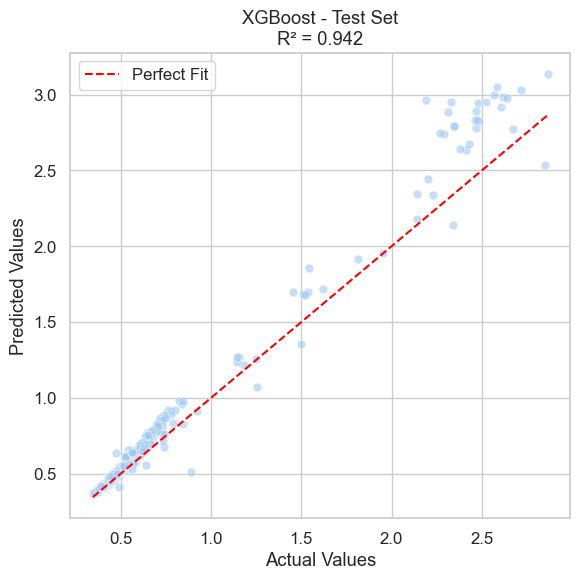

In [132]:
# Plotting the R2 curve for testing prediction
plot_regression_fit(y_test, y_pred_test, model_name="XGBoost", dataset_type="Test", figsize=(6, 6))

In [132]:
# Define folder
MODEL_FOLDER = Path("../models/Ripple")

# Download the processing pipelines
# Save cleaning pipeline
with open(MODEL_FOLDER / "cleaning_pipeline.pkl", "wb") as f:
    cloudpickle.dump(cleaning_pipeline, f)

# Save engineering pipeline
with open(MODEL_FOLDER / "eng_pipeline.pkl", "wb") as f:
    cloudpickle.dump(eng_pipeline, f)

# Save data transform pipeline
with open(MODEL_FOLDER / "transform_pipeline.pkl", "wb") as f:
    cloudpickle.dump(data_transform_pipeline, f)

In [133]:
# Save the best model
best_model = xg_search.best_estimator_
joblib.dump(best_model, f"{MODEL_FOLDER}/model.joblib")

['..\\models\\Ripple/model.joblib']

In [133]:
# <Student to fill this section>
model_performance_explanations = """
The XGBoost model demonstrated strong and consistent predictive performance across training, validation, and test sets. The RMSE values remained 
low and R² scores high, indicating that the model effectively captured underlying price patterns without overfitting. The slight increase in test 
RMSE is reasonable given the inherent volatility of cryptocurrency markets. The close alignment between validation and test results confirms good 
generalisation. Overall, the model was robust and reliable, though further enhancements could be explored through additional temporal features or 
hybrid deep-learning approaches.
"""

In [134]:
# Do not modify this code
print_tile(size="h3", key='model_performance_explanations', value=model_performance_explanations)

### K.5 Business Impact from Current Model Performance

> The experimental results indicate that the XGBoost model performs reliably in predicting the next-day high prices of cryptocurrencies, aligning well with the business objective of providing accurate short-term market forecasts. This predictive capability supports better investment decisions and risk management. However, incorrect predictions—especially underestimating high prices—could lead to missed profit opportunities, while overestimations may cause premature investments and potential losses. Although the model shows strong generalisation, occasional inaccuracies are inevitable due to market volatility. Continuous monitoring, model retraining, and integrating more dynamic market indicators can help mitigate these business risks and enhance forecasting precision.



In [135]:
# <Student to fill this section>

In [136]:
# <Student to fill this section>
business_impacts_explanations = """
The experimental results indicate that the XGBoost model performs reliably in predicting the next-day high prices of cryptocurrencies, 
aligning well with the business objective of providing accurate short-term market forecasts. This predictive capability supports better 
investment decisions and risk management. However, incorrect predictions—especially underestimating high prices—could lead to missed profit 
opportunities, while overestimations may cause premature investments and potential losses. Although the model shows strong generalisation, 
occasional inaccuracies are inevitable due to market volatility. Continuous monitoring, model retraining, and integrating more dynamic market 
indicators can help mitigate these business risks and enhance forecasting precision.
"""

In [137]:
# Do not modify this code
print_tile(size="h3", key='business_impacts_explanations', value=business_impacts_explanations)

## L. Project Outcomes

In [138]:
# <Student to fill this section>
experiment_outcome = "Hypothesis Confirmed" # Either 'Hypothesis Confirmed', 'Hypothesis Partially Confirmed' or 'Hypothesis Rejected'

In [139]:
# Do not modify this code
print_tile(size="h2", key='experiment_outcomes_explanations', value=experiment_outcome)

In [144]:
# <Student to fill this section>
experiment_results_explanations = """
The experiment demonstrated that the XGBoost-based approach is highly effective for short-term cryptocurrency price forecasting, showing strong 
generalisation across unseen validation and test data. A key insight gained is the significant contribution of momentum and volatility-aware 
features, which allow the model to better adapt to changing market conditions. However, the model still exhibits limitations during sudden market 
shocks, indicating that historical price and volume features alone may not fully capture external influences such as news sentiment or macroeconomic 
events. This suggests that further experimentation is worthwhile rather than considering the approach a dead end.

Potential next steps include integrating sentiment analysis or on-chain metrics to improve model responsiveness during volatile periods, 
experimenting with temporal deep learning models such as LSTMs or Transformers to better capture sequential dependencies and 
combining XGBoost with simpler trend-based models to stabilize predictions during sudden swings. Given the strong predictive performance achieved, 
the current model is suitable for controlled production deployment, ideally with automated retraining and real-time monitoring to ensure 
continued reliability.

"""

In [145]:
# Do not modify this code
print_tile(size="h2", key='experiment_results_explanations', value=experiment_results_explanations)